#Data Augmentation

The goal for this notebook is to be able to make a confusion matrix about a neural network predicting MNIST.

###Regular Model
This performed very well reaching an accuracy above 99%

###Data Augmentation
Linear did not perform well.

ReLU was better but still not great. 

https://stackoverflow.com/questions/53351963/mnist-get-confusion-matrix

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


import itertools

tf.random.set_seed(1)


Loading the Data

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Reshaping the data so it is easier to work with

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.2),
])

Now we can begin our function to build our CNN. We do this to be able to run the CNN multiple times with different parameters.

In [ ]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train):
  cnn_model = build_cnn(conv_layers, pool_layers)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


  # fits the model on batches with real-time data augmentation:
  history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  confusionmatrix(model= cnn_model)

  return history

This builds the actual CNN.

In [ ]:
def build_cnn(conv_layers, pool_layers):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(30, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.4))
    x=15
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
          model_cnn.add(Conv2D(x, kernel_size=3,activation='relu',padding='same'))
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
          model_cnn.add(Dropout(0.4))
          x=x*2
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, 
        activation='relu'))
    model_cnn.add(Dense(50, 
        activation='relu'))
    model_cnn.add(Dense(10, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

This will plot our accuracy for analysis.

In [ ]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [ ]:
def confusionmatrix(model):

  confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

  confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.figure(figsize=(14,14))
  plt.imshow(confusion_norm, interpolation='nearest') 
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  fmt = '.3f'
  thresh = confusion_norm.max() / 2.
  for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
    plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
    color="black" if confusion_norm[i, j] > thresh else "white")
  plt.tight_layout()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)            

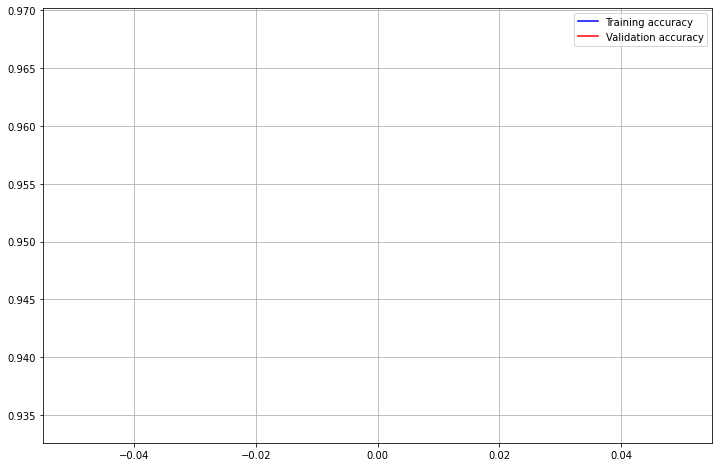

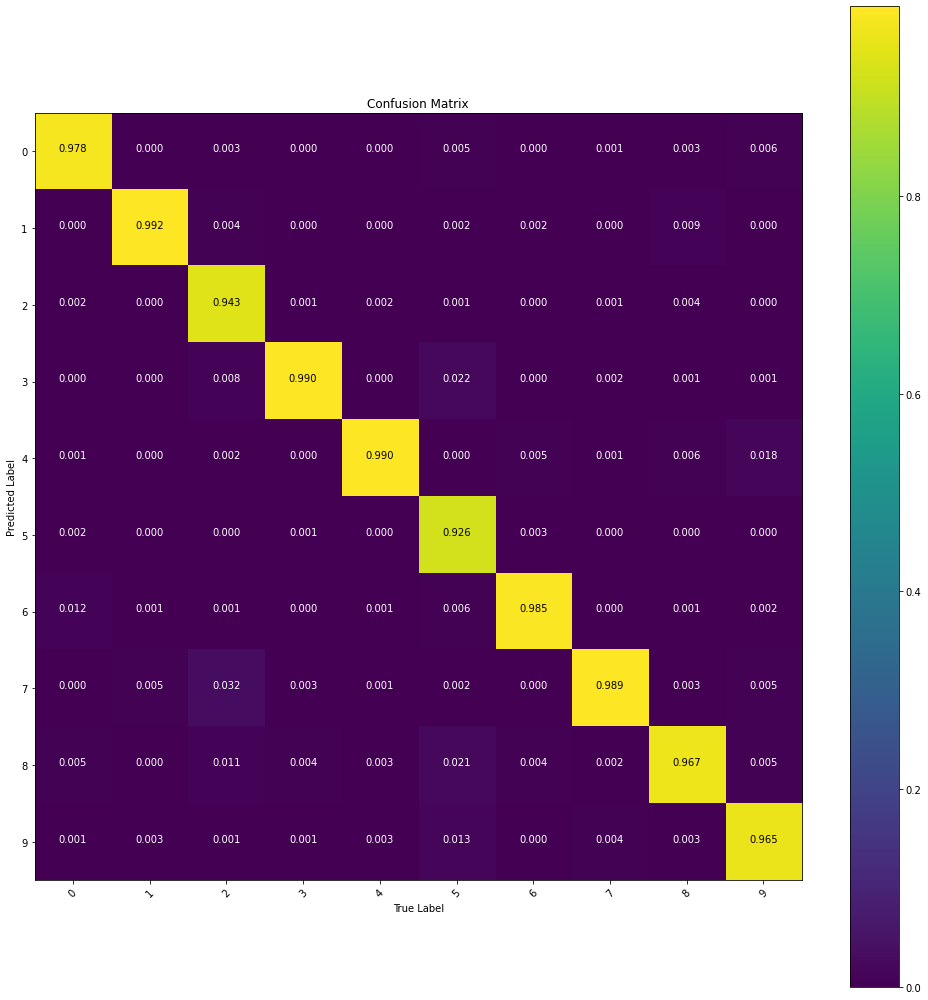

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=1, X_train=X_train, y_train=y_train)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 15)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 735)              

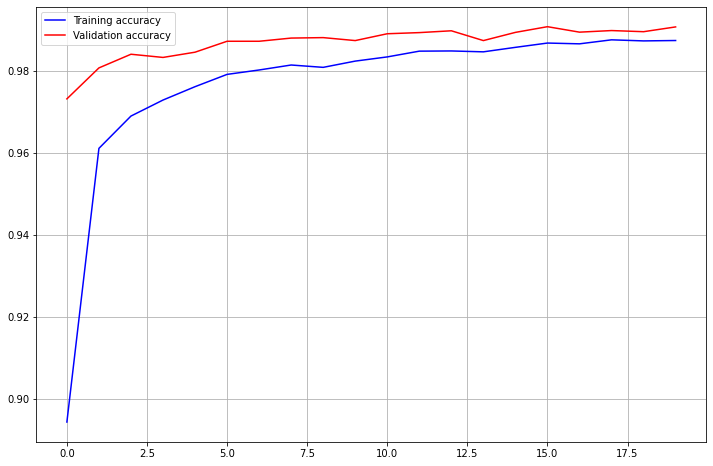

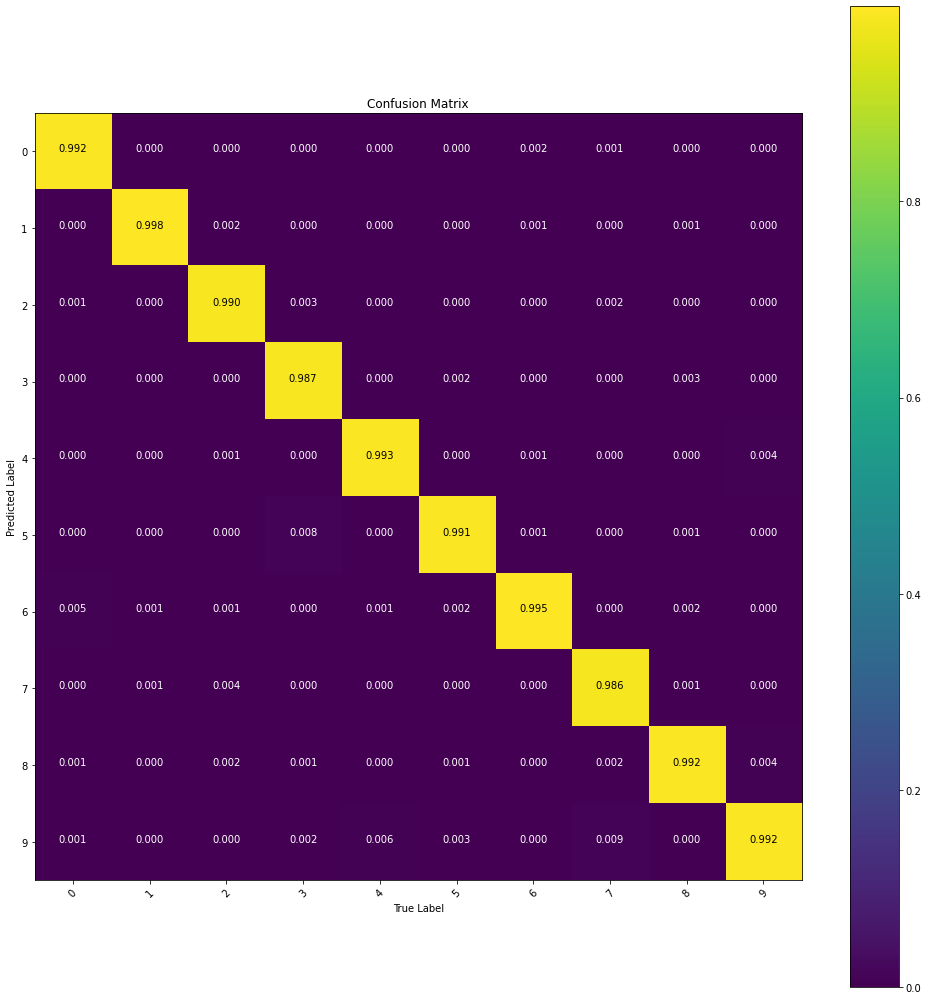

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=20, X_train=X_train, y_train=y_train)

###Data Augmentation

Linear

Epoch 1/30
1313/1313 [==============================] - 134s 102ms/step - loss: 1.2166 - accuracy: 0.5936 - val_loss: 0.8098 - val_accuracy: 0.7086
Epoch 2/30
1313/1313 [==============================] - 139s 106ms/step - loss: 0.9414 - accuracy: 0.6819 - val_loss: 1.0047 - val_accuracy: 0.6603
Epoch 3/30
1313/1313 [==============================] - 132s 100ms/step - loss: 0.8813 - accuracy: 0.7045 - val_loss: 0.7633 - val_accuracy: 0.7401
Epoch 4/30
1313/1313 [==============================] - 134s 102ms/step - loss: 0.8456 - accuracy: 0.7146 - val_loss: 1.0085 - val_accuracy: 0.6741
Epoch 5/30
1313/1313 [==============================] - 134s 102ms/step - loss: 0.8190 - accuracy: 0.7251 - val_loss: 0.6459 - val_accuracy: 0.7921
Epoch 6/30
1313/1313 [==============================] - 133s 102ms/step - loss: 0.7995 - accuracy: 0.7331 - val_loss: 0.7185 - val_accuracy: 0.7660
Epoch 7/30
1313/1313 [==============================] - 138s 105ms/step - loss: 0.7837 - accuracy: 0.7368 - val_

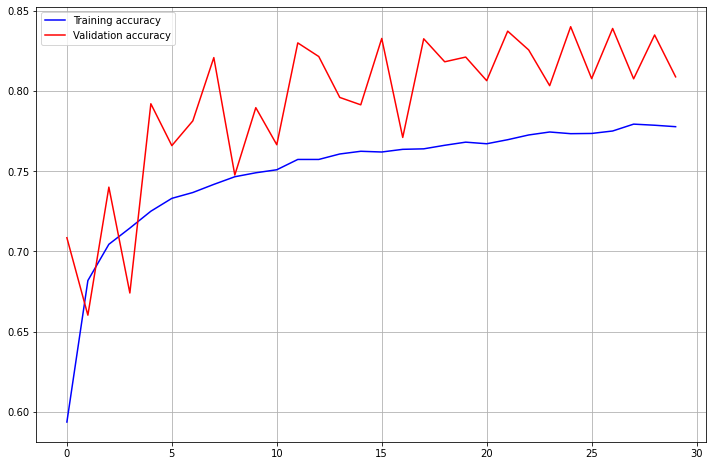

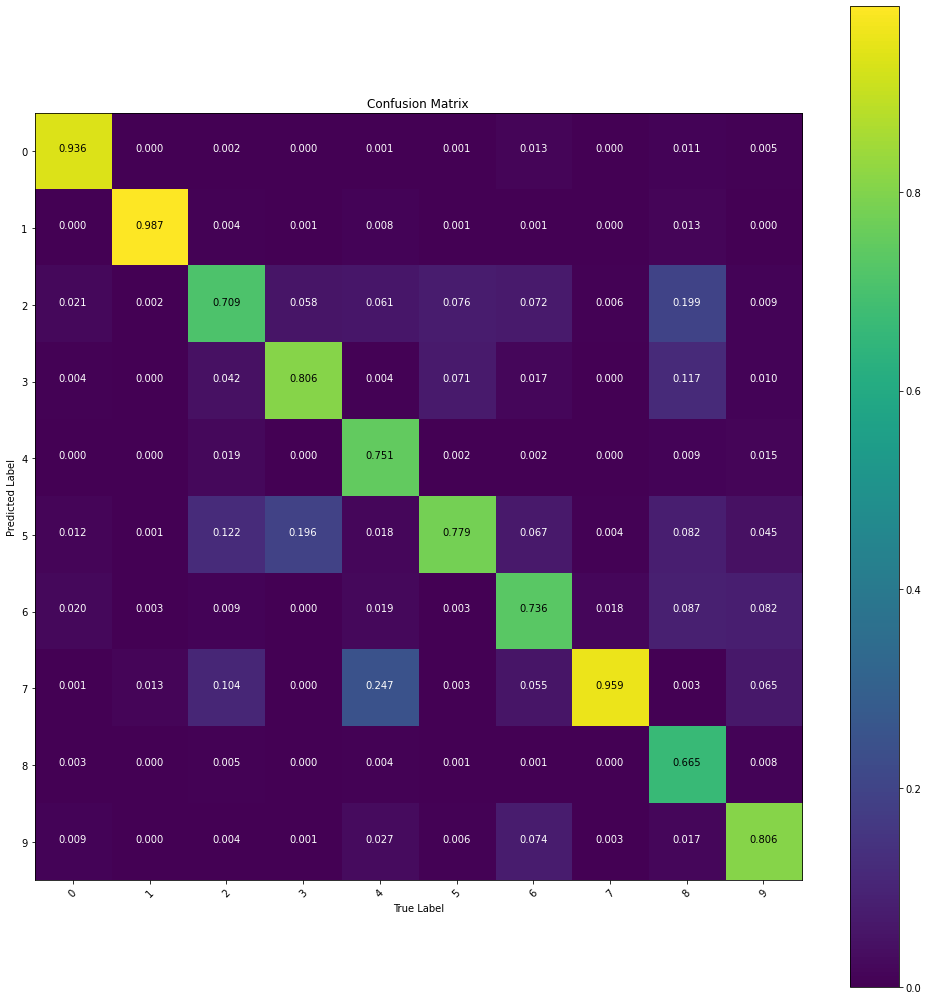

In [ ]:
 cnn_model = Sequential([data_augmentation,
                         Conv2D(32, kernel_size=5,activation='linear',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Conv2D(64, kernel_size=5,activation='linear',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Flatten(),
                         Dense(128),
                         BatchNormalization(),
                         Dense(10, activation='softmax')])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, epochs=30, validation_split=0.3)

plot_history(history, 30)

confusionmatrix(model= cnn_model)

ReLU

Epoch 1/30
1313/1313 [==============================] - 143s 109ms/step - loss: 1.6124 - accuracy: 0.6144 - val_loss: 0.7495 - val_accuracy: 0.7341
Epoch 2/30
1313/1313 [==============================] - 141s 107ms/step - loss: 0.7426 - accuracy: 0.7492 - val_loss: 0.5216 - val_accuracy: 0.8265
Epoch 3/30
1313/1313 [==============================] - 142s 108ms/step - loss: 0.6422 - accuracy: 0.7844 - val_loss: 0.4084 - val_accuracy: 0.8698
Epoch 4/30
1313/1313 [==============================] - 143s 109ms/step - loss: 0.5808 - accuracy: 0.8075 - val_loss: 0.4072 - val_accuracy: 0.8645
Epoch 5/30
1313/1313 [==============================] - 143s 109ms/step - loss: 0.5418 - accuracy: 0.8195 - val_loss: 0.4110 - val_accuracy: 0.8698
Epoch 6/30
1313/1313 [==============================] - 139s 106ms/step - loss: 0.5116 - accuracy: 0.8332 - val_loss: 0.4019 - val_accuracy: 0.8716
Epoch 7/30
1313/1313 [==============================] - 142s 108ms/step - loss: 0.4918 - accuracy: 0.8375 - val_

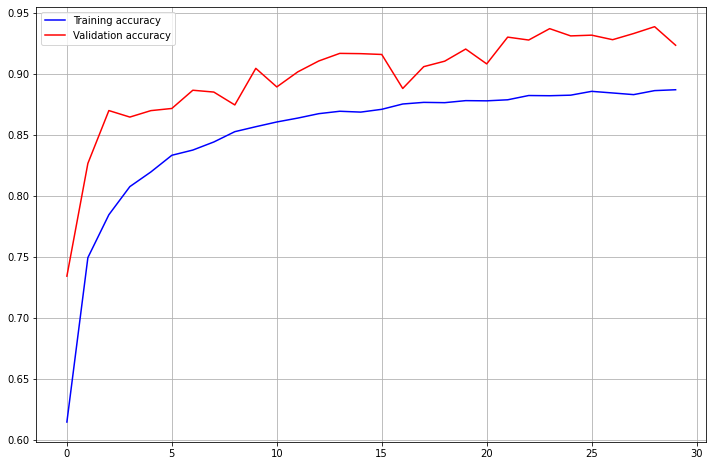

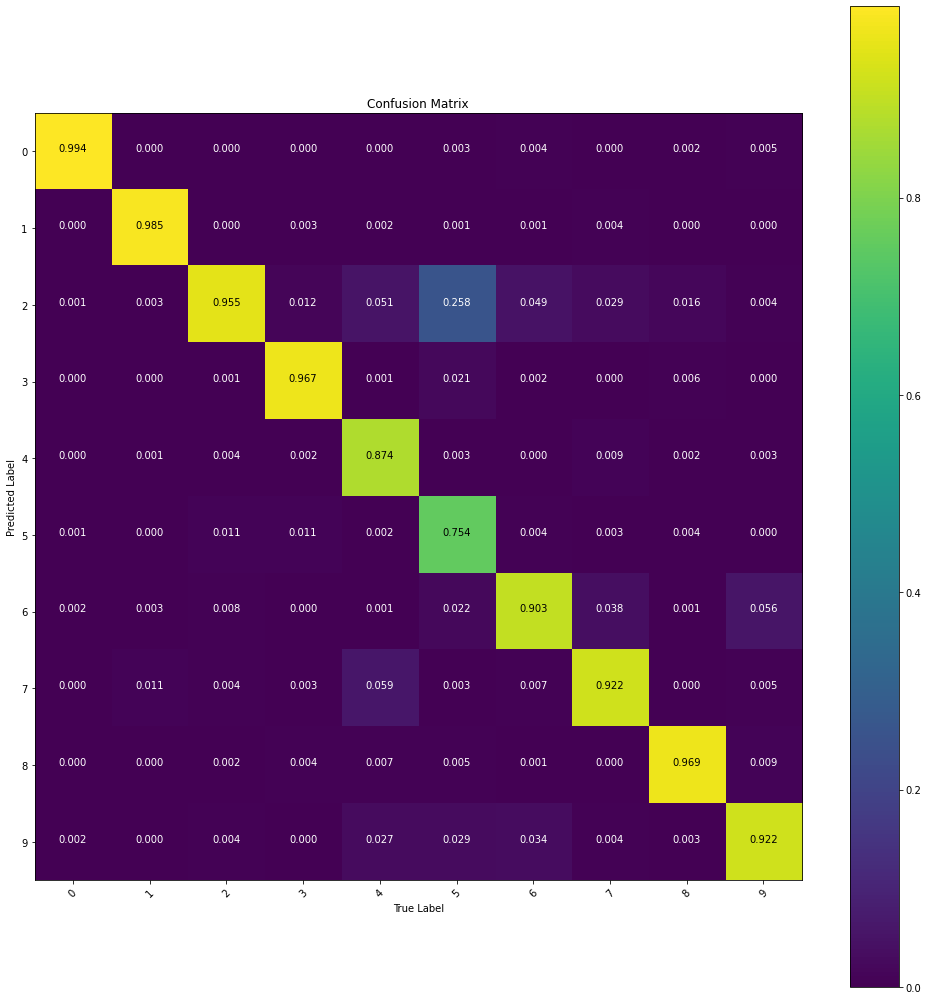

In [ ]:
nmodel = Sequential([data_augmentation,
                         Conv2D(32, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Conv2D(64, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Flatten(),
                         Dense(128),
                         Dense(10, activation='softmax')])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
nmodel.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = nmodel.fit(X_train, y_train, epochs=30, validation_split=0.3)

print(nmodel.summary())

plot_history(history, 30)

confusionmatrix(model= nmodel)

Epoch 1/30
1313/1313 [==============================] - 186s 142ms/step - loss: 1.3396 - accuracy: 0.5920 - val_loss: 0.5148 - val_accuracy: 0.8334
Epoch 2/30
1313/1313 [==============================] - 184s 140ms/step - loss: 0.6700 - accuracy: 0.7773 - val_loss: 0.3839 - val_accuracy: 0.8766
Epoch 3/30
1313/1313 [==============================] - 187s 143ms/step - loss: 0.5500 - accuracy: 0.8190 - val_loss: 0.3323 - val_accuracy: 0.8956
Epoch 4/30
1313/1313 [==============================] - 187s 142ms/step - loss: 0.4962 - accuracy: 0.8379 - val_loss: 0.3283 - val_accuracy: 0.8975
Epoch 5/30
1313/1313 [==============================] - 187s 142ms/step - loss: 0.4564 - accuracy: 0.8513 - val_loss: 0.2863 - val_accuracy: 0.9068
Epoch 6/30
1313/1313 [==============================] - 187s 142ms/step - loss: 0.4331 - accuracy: 0.8600 - val_loss: 0.2960 - val_accuracy: 0.9033
Epoch 7/30
1313/1313 [==============================] - 185s 141ms/step - loss: 0.4100 - accuracy: 0.8655 - val_

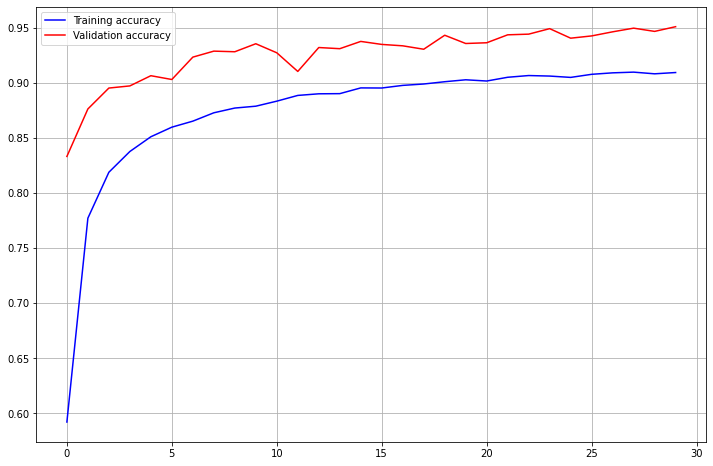

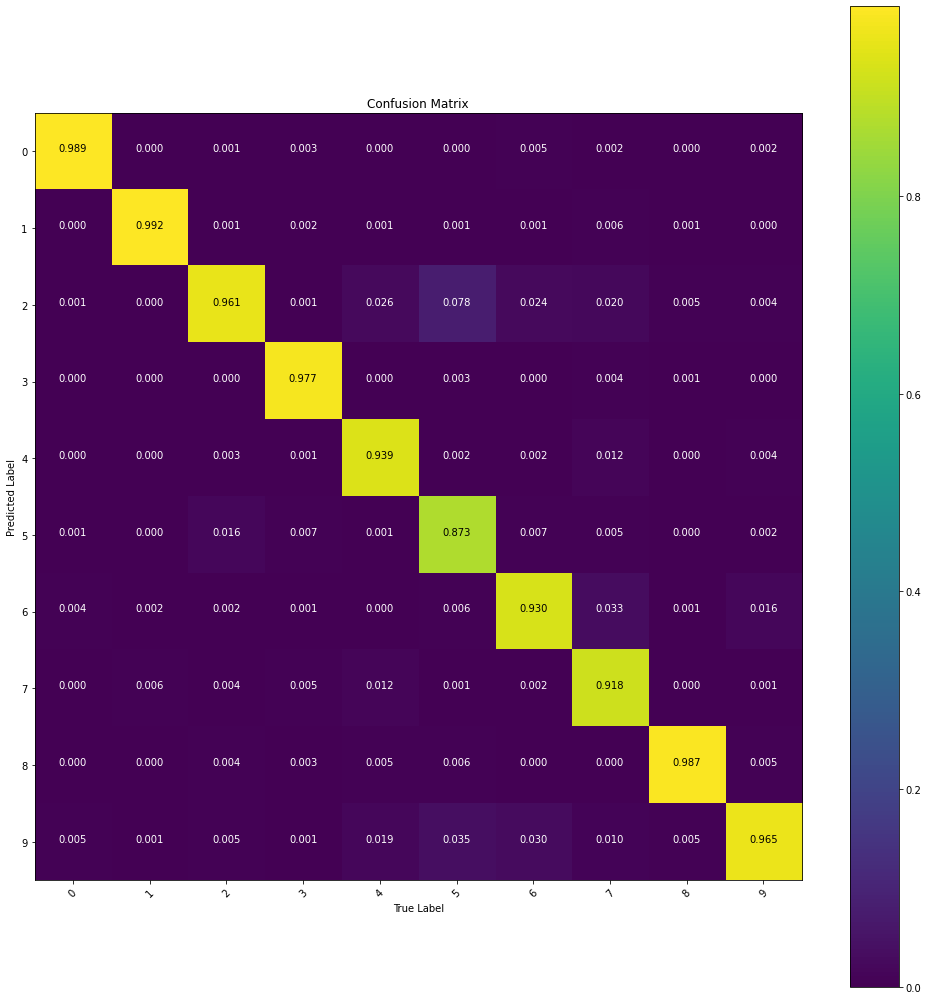

In [ ]:
newmodel = Sequential([data_augmentation,
                         Conv2D(32, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Conv2D(64, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Conv2D(64, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Flatten(),
                         Dense(128),
                         Dense(10, activation='softmax')])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
newmodel.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = newmodel.fit(X_train, y_train, epochs=30, validation_split=0.3)

print(newmodel.summary())

plot_history(history, 30)

confusionmatrix(model= newmodel)

Epoch 1/30
1313/1313 [==============================] - 136s 104ms/step - loss: 0.8726 - accuracy: 0.8334 - val_loss: 0.2030 - val_accuracy: 0.9424
Epoch 2/30
1313/1313 [==============================] - 135s 103ms/step - loss: 0.2590 - accuracy: 0.9230 - val_loss: 0.1227 - val_accuracy: 0.9641
Epoch 3/30
1313/1313 [==============================] - 136s 103ms/step - loss: 0.2005 - accuracy: 0.9395 - val_loss: 0.1211 - val_accuracy: 0.9629
Epoch 4/30
1313/1313 [==============================] - 136s 103ms/step - loss: 0.1879 - accuracy: 0.9422 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 5/30
1313/1313 [==============================] - 136s 103ms/step - loss: 0.1771 - accuracy: 0.9453 - val_loss: 0.1110 - val_accuracy: 0.9660
Epoch 6/30
1313/1313 [==============================] - 136s 104ms/step - loss: 0.1620 - accuracy: 0.9486 - val_loss: 0.0849 - val_accuracy: 0.9722
Epoch 7/30
1313/1313 [==============================] - 135s 103ms/step - loss: 0.1511 - accuracy: 0.9528 - val_

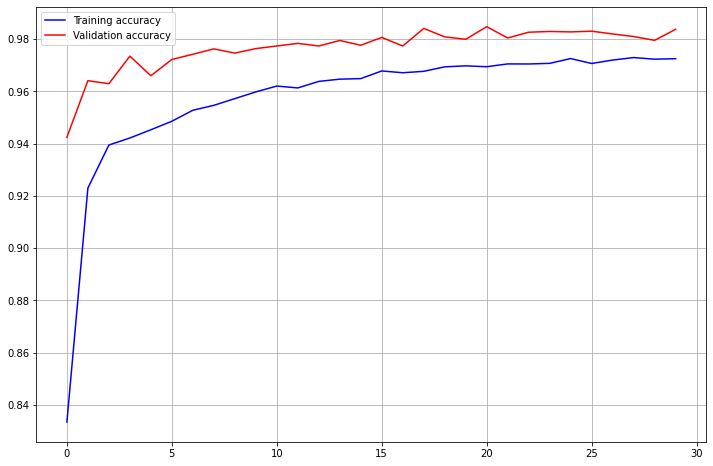

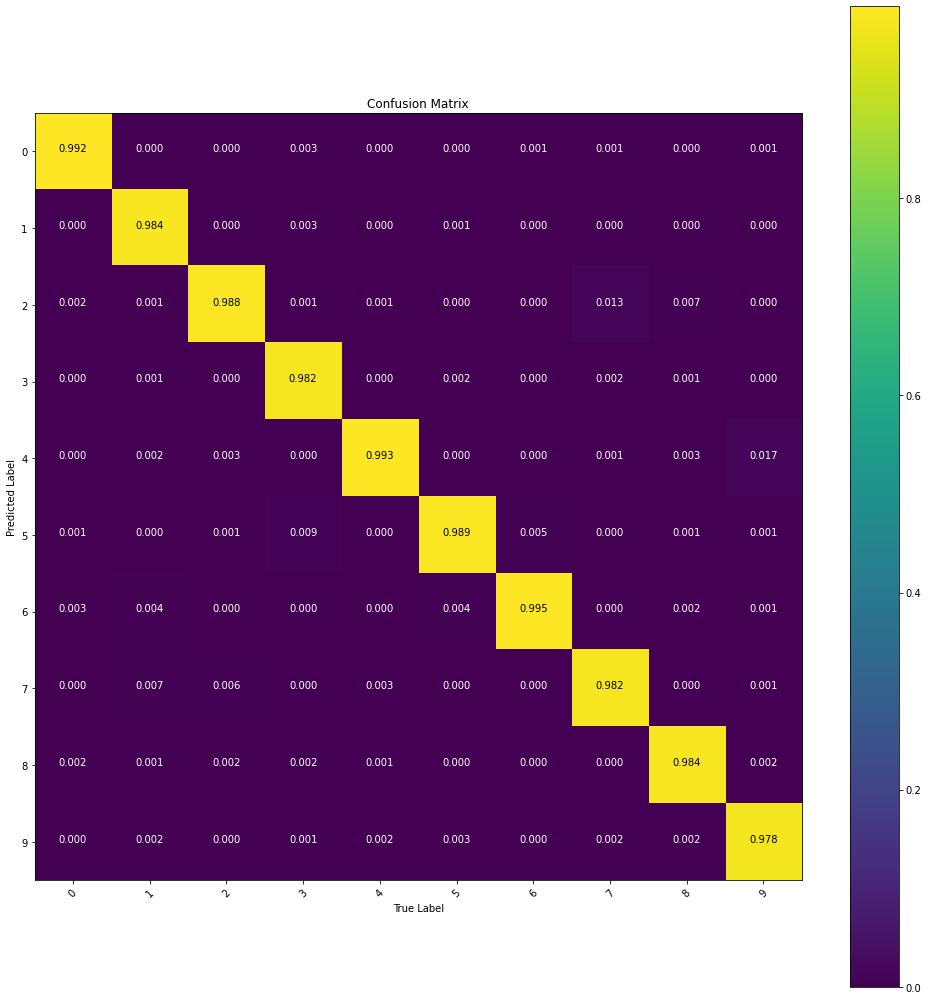

In [18]:
newmodel = Sequential([data_augmentation,
                         Conv2D(32, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Conv2D(64, kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same'),
                         BatchNormalization(),
                         MaxPooling2D((2, 2), padding='same'),
                         Dropout(0.4),
                         Flatten(),
                         Dense(128),
                         Dense(10, activation='softmax')])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
newmodel.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = newmodel.fit(X_train, y_train, epochs=30, validation_split=0.3)

print(newmodel.summary())

plot_history(history, 30)

confusionmatrix(model= newmodel)